In [15]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# A Theoretical Foundation for the Age-Area Hypothesis
## Matthew J. Baker
## Hunter College and the Graduate Center, CUNY
## March 16, 2016

# Motivation and Overview

* Research on Indigenous peoples and the economics of culture and institutions.

* How and why do cultural practices, customary norms, etc. change and evolve over time?

# Previous work:
  - Nature of Land Tenure [(Baker, 2003)](https://ideas.repec.org/a/ucp/jpolec/v111y2003i1p124-173.html)
  - Post-marital residence [(Baker and Jacobsen, 2007a)](https://ideas.repec.org/a/oup/jleorg/v23y2007i1p208-241.html)
  - Land inheritance [(Baker and Miceli, 2005)](https://ideas.repec.org/a/eee/jeborg/v56y2005i1p77-102.html)
  - Origins of Agriculture [(Baker, 2008)](https://ideas.repec.org/a/kap/jecgro/v13y2008i4p257-292.html)
  - Marriage and the Division of Labor [(Baker and Jacobsen, 2007b)](https://ideas.repec.org/a/ucp/jlabec/v25y2007p763-793.html)
  - Hierarchy and Governance [(Baker, Bulte, and Weisdorf, 2010)](https://ideas.repec.org/a/cup/jinsec/v6y2010i02p215-242_99.html)
  
***Behavioral Ecology*** - Theories of how environment and/or technology drive cultural evolution and change.     

# Theories need tests
How could one devise a formal test of such theories? 

One possibility is ***Cross-Cultural Data*** - Data comprised of a list of different societies, along with:
  - Technological information
  - Environmental information
  - Information on culture pratices and institutions
  
**Anthropological tradition** - [The comparative method](http://anthropology.ua.edu/cultures/cultures.php?culture=Cross-Cultural%20Analysis)

# Prominent Examples:
## SCCS (Standard Cross-Cultural Sample)
## Ethographic Atlas 
Essentially, the work of George Murdock, Douglas White - and a lot of students. An example:


In [16]:
import pandas as pd
Data=pd.read_pickle('IEData\\MasterData.pkl')
pd.set_option('max_colwidth', 7)

In [17]:
Data.sort_index(inplace = True)

In [18]:
Data.rename(columns = {'eaName':'EAname', 'ruhlen_1': 'phylum', 'v1':'hunt', 'v2':'gather',
                       'v3':'fish', 'v4':'farm', 'v5':'herd', 'v6':'Mar', 
                       'v35': 'games', 'v71': 'slavery'}, inplace=True)
Data[['EAname','phylum','lat','lon','hunt','gather','fish','farm','herd','Mar',
                      'games','slavery']].iloc[0:10]

,EAname,phylum,lat,lon,hunt,gather,fish,farm,herd,Mar,games,slavery
0,KUNG,KHO...,-19.00,21.00,8,2,0,0,0,2,2,1
1,WARRAU,AME...,9.33,-61.67,8,2,0,0,0,2,2,1
2,KUNG,KHO...,-19.67,18.00,8,2,0,0,0,2,2,1
3,SWAZI,NIG...,-26.50,31.00,1,1,0,2,6,1,0,1
4,PENDE,NIG...,4.00,18.50,1,0,1,2,6,3,0,2
5,BAJUN,NIG...,-6.50,39.00,0,1,4,1,4,1,0,2
6,NYORO,NIG...,0.50,30.50,0,1,1,2,6,1,6,2
7,KPE,NIG...,7.00,-10.00,0,1,1,3,5,1,0,2
9,FON,NIG...,6.42,2.17,0,2,1,2,5,1,8,1
10,KISSI,NIG...,9.06,-10.18,0,0,0,1,8,1,0,2


# Difficulties
As recognized by Galton's reaction to Edward Tylor's work in 1888: Usual statistical independence assumptions completely break down:
* Spatial dependence - borrowing and learning
* Historical dependence - common ancestry
* Second-order Spatial and Historical dependence


And what really is the sampling experiment? 

Versions of this problem in economics: [Manski's (1993)](http://www.jstor.org/stable/2298123?seq=1#page_scan_tab_contents) **reflection problem**, Spatial Econometrics. [(Lesage's, 1999)](http://www.spatial-econometrics.com/html/sbook.pdf)

# My idea and approach:
Over past 20 years:
* Bayesian and simulation-based methods make estimation of almost anything possible
* Developments in computational linguistics - maximum likelihood methods on phylogenies as in genetics.

In principle, it is possible to recover distributions over past histories (which peoples were where, when).

# Today - 

While in the end, I hope to show a bit more of all this, for today:

A part of this project - location. **How can one use phylogenetic information to assign locations and times to different groups?** 

Mathematical modelling of the likely locations of groups and peoples at particular times. 

# Starting point - Sapir's _Age-Area Hypothesis_ 

"...the area that has the greatest diversity...is likely to be the location of the original homeland...In saying this, 
we are assuming the lowest number of population movements to account for the geographical distribution of the subgroups..." [Crowley and Bowern, 2010, p. 313](https://books.google.com/books?id=_N8v-s6fyt0C&pg=PA313&lpg=PA313&dq=historical+linguistics+age-area+hypothesis&source=bl&ots=O55FCvNw0O&sig=u-0kKlYDu_U2SUxIZhxOsYVdJhw&hl=en&sa=X&ved=0ahUKEwjT06-8oq_LAhXM1x4KHfEXAhAQ6AEIMDAC#v=onepage&q=historical%20linguistics%20age-area%20hypothesis&f=false)

Questions: what is meant by "likely"? How likely? Minimum population movements does not imply AAH.


# An Example
## Rooted Tree with Five Groups

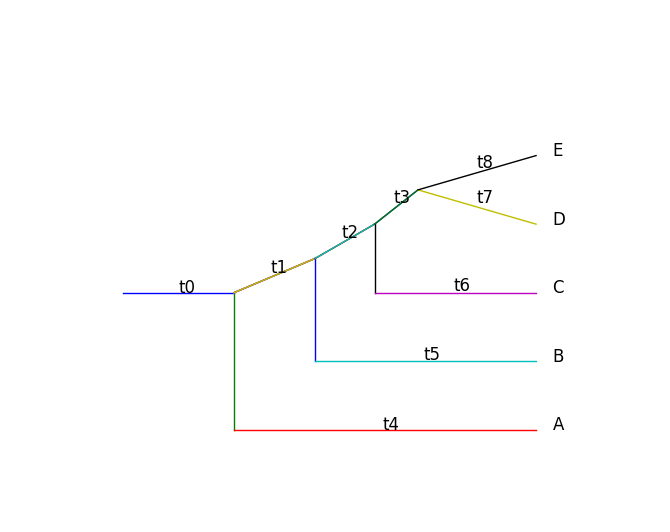

In [19]:
from IPython.core.display import Image 
Image(filename='Writeup\\figure1.png')

The age-area hypothesis suggests that the origins of this group should be at point $A$. This is the maximally differentiated group in the bunch. 

If we apply the AAH recursively, we find that the migratory route should be $A$ to $B$ to $C$ to $D$ or $E$...

In [20]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

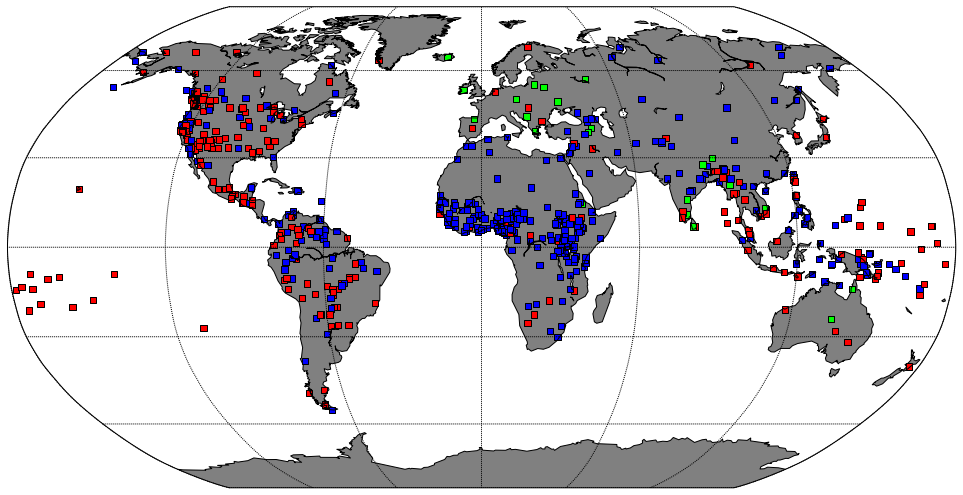

In [25]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

DataSlice = Data[Data.hunt >=0 ]   #Really just a way of selecting non-zero observations.

Phyla = np.unique(DataSlice['phylum'])
DataSlice['phylumnum'] = np.nan

adjfac = 2

for i in range(len(Phyla)):
    DataSlice['phylumnum'].loc[DataSlice['phylum'] == Phyla[i]] = i
    
DataSlice['newag'] = 0
DataSlice['newag'].loc[DataSlice['farm']> 2] = 2
DataSlice['newag'].loc[DataSlice['herd']> 6] = 1 

DataSlice['newmar'] = 0 
DataSlice['newmar'].loc[DataSlice['Mar']> 2] = 1
DataSlice['newmar'].loc[DataSlice['Mar']> 6] = 2
    
y = np.asarray(DataSlice['lat']).flatten().tolist()
x = np.asarray(DataSlice['lon']).flatten().tolist()

y2 = np.asarray(DataSlice['lat']).flatten().tolist()
x2 = np.asarray(DataSlice['lon']+2.5).flatten().tolist()

y3 = np.asarray(DataSlice['lat']).flatten().tolist()
x3 = np.asarray(DataSlice['lon']-2.5).flatten().tolist()

name = np.asarray(DataSlice['EAname']).flatten().tolist()

Mar = np.asarray(DataSlice['newmar']).flatten().tolist()
ag  = np.asarray(DataSlice['newag']).flatten().tolist()
phy = np.asarray(DataSlice['phylumnum']).flatten().tolist()

myfig = plt.figure(figsize=(17,14))
myfig.hold()

m = Basemap(projection='robin',lon_0=0,lat_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray', zorder=0)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

xpt,ypt = m(x,y)
xpt2,ypt2 = m(x2,y2)
xpt3,ypt3 = m(x3,y3)

m.scatter(xpt, ypt, s=40, c = Mar, marker = 's', cmap='brg')
#m.scatter(xpt, ypt, s=40, c = ag, marker = 's', cmap='brg')
#m.scatter(xpt3, ypt3, s=40, c =phy, marker = 's', cmap='Accent')
myfig.savefig('IEMaps\\WorldMarriageMap', bbox_inches = 'tight')

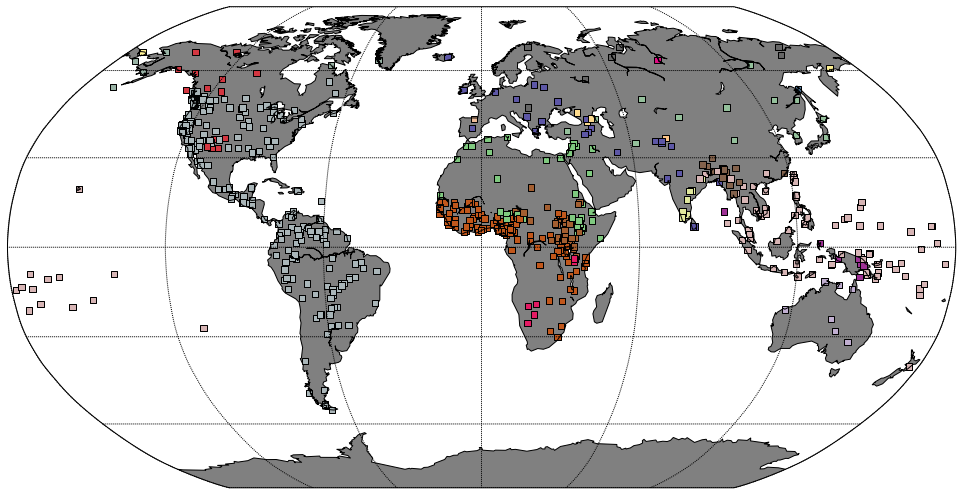

In [27]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

DataSlice = Data[Data.hunt >=0 ]   #Really just a way of selecting non-zero observations.

Phyla = np.unique(DataSlice['phylum'])
DataSlice['phylumnum'] = np.nan

adjfac = 2

for i in range(len(Phyla)):
    DataSlice['phylumnum'].loc[DataSlice['phylum'] == Phyla[i]] = i
    
DataSlice['newag'] = 0
DataSlice['newag'].loc[DataSlice['farm']> 2] = 2
DataSlice['newag'].loc[DataSlice['herd']> 6] = 1 

DataSlice['newmar'] = 0 
DataSlice['newmar'].loc[DataSlice['Mar']> 2] = 1
DataSlice['newmar'].loc[DataSlice['Mar']> 6] = 2
    
y = np.asarray(DataSlice['lat']).flatten().tolist()
x = np.asarray(DataSlice['lon']).flatten().tolist()

y2 = np.asarray(DataSlice['lat']).flatten().tolist()
x2 = np.asarray(DataSlice['lon']+2.5).flatten().tolist()

y3 = np.asarray(DataSlice['lat']).flatten().tolist()
x3 = np.asarray(DataSlice['lon']-2.5).flatten().tolist()

name = np.asarray(DataSlice['EAname']).flatten().tolist()

Mar = np.asarray(DataSlice['newmar']).flatten().tolist()
ag  = np.asarray(DataSlice['newag']).flatten().tolist()
phy = np.asarray(DataSlice['phylumnum']).flatten().tolist()

myfig = plt.figure(figsize=(17,14))
myfig.hold()

m = Basemap(projection='robin',lon_0=0,lat_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray', zorder=0)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

xpt,ypt = m(x,y)
xpt2,ypt2 = m(x2,y2)
xpt3,ypt3 = m(x3,y3)

m.scatter(xpt, ypt, s=40, c = phy, marker = 's', cmap='Accent')
#m.scatter(xpt, ypt, s=40, c = ag, marker = 's', cmap='brg')
#m.scatter(xpt3, ypt3, s=40, c =phy, marker = 's', cmap='Accent')
myfig.savefig('IEMaps\\WorldMarriageMap2', bbox_inches = 'tight')

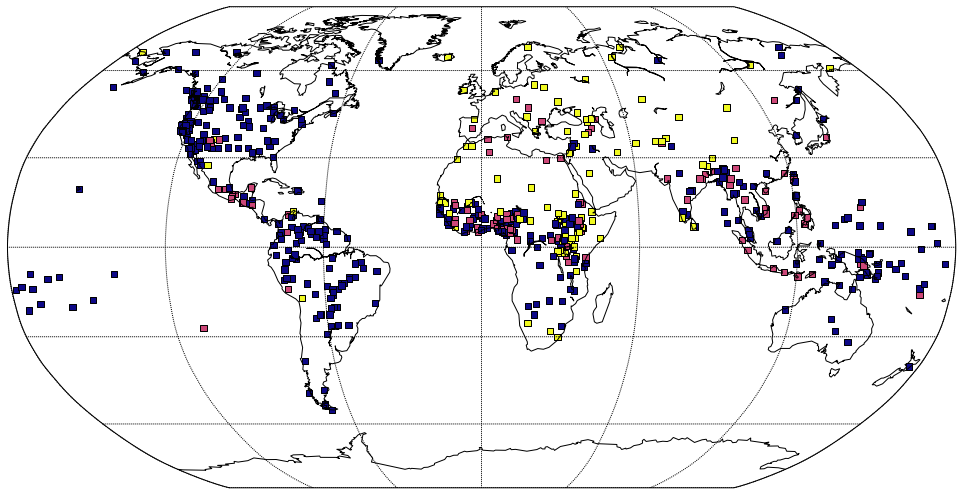

In [34]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

DataSlice = Data[Data.hunt >=0 ]   #Really just a way of selecting non-zero observations.

Phyla = np.unique(DataSlice['phylum'])
DataSlice['phylumnum'] = np.nan

adjfac = 2

for i in range(len(Phyla)):
    DataSlice['phylumnum'].loc[DataSlice['phylum'] == Phyla[i]] = i
    
DataSlice['newag'] = 0
DataSlice['newag'].loc[DataSlice['farm']> 2] = 2
DataSlice['newag'].loc[DataSlice['herd']> 6] = 1 

DataSlice['newmar'] = 0 
DataSlice['newmar'].loc[DataSlice['Mar']> 2] = 1
DataSlice['newmar'].loc[DataSlice['Mar']> 6] = 2
    
y = np.asarray(DataSlice['lat']).flatten().tolist()
x = np.asarray(DataSlice['lon']).flatten().tolist()

y2 = np.asarray(DataSlice['lat']).flatten().tolist()
x2 = np.asarray(DataSlice['lon']+2.5).flatten().tolist()

y3 = np.asarray(DataSlice['lat']).flatten().tolist()
x3 = np.asarray(DataSlice['lon']-2.5).flatten().tolist()

name = np.asarray(DataSlice['EAname']).flatten().tolist()

Mar = np.asarray(DataSlice['newmar']).flatten().tolist()
ag  = np.asarray(DataSlice['newag']).flatten().tolist()
phy = np.asarray(DataSlice['phylumnum']).flatten().tolist()

myfig = plt.figure(figsize=(17,14))
myfig.hold()

m = Basemap(projection='robin',lon_0=0,lat_0=0,resolution='c')
m.drawcoastlines()
#m.fillcontinents(color='gray', zorder=0)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

xpt,ypt = m(x,y)
xpt2,ypt2 = m(x2,y2)
xpt3,ypt3 = m(x3,y3)

m.scatter(xpt, ypt, s=40, c = ag, marker = 's', cmap='plasma')
#m.scatter(xpt, ypt, s=40, c = ag, marker = 's', cmap='brg')
#m.scatter(xpt3, ypt3, s=40, c =phy, marker = 's', cmap='Accent')
myfig.savefig('IEMaps\\WorldMarriageMap', bbox_inches = 'tight')

## Illustration: Phylum, Marriage, Agriculture

In [ ]:
from IPython.display import Image
Image(filename='IEMaps\\WorldMarriageMap.png')

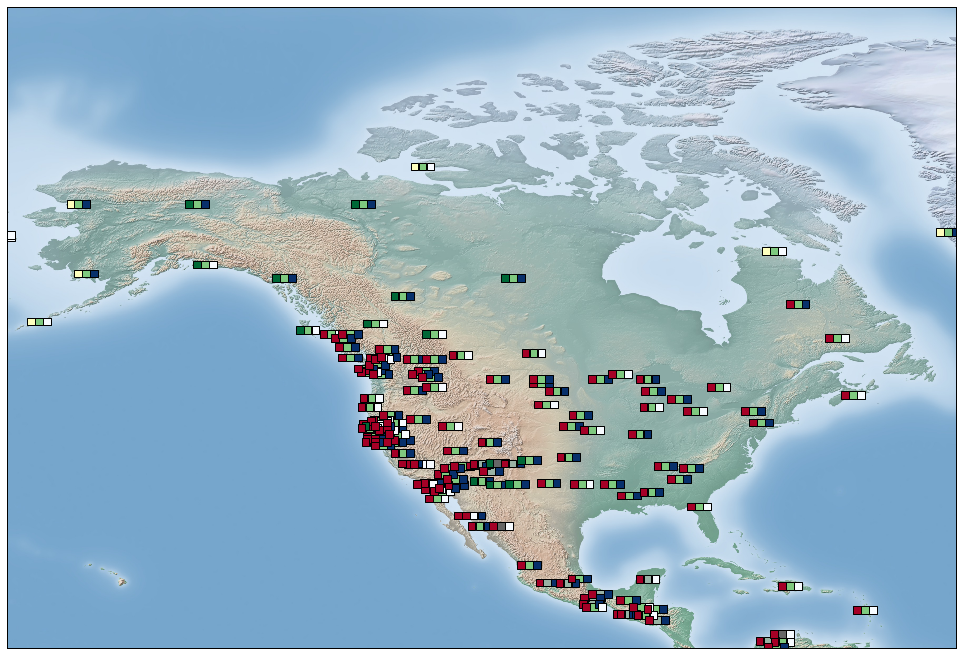

In [12]:
DataSlice = Data[(Data.hunt >=0) & (Data.phylum =="NADENE") | (Data.phylum =="AMERIND") | (Data.phylum=="ESKIMOAL") ]   #Really just a way of selecting non-zero observations.

Phyla = np.unique(DataSlice['phylum'])
DataSlice['phylumnum'] = np.nan

for i in range(len(Phyla)):
    DataSlice['phylumnum'].loc[DataSlice['phylum'] == Phyla[i]] = i

    
DataSlice['newag'] = 0
DataSlice['newag'].loc[DataSlice['farm']> 2] = 2
DataSlice['newag'].loc[DataSlice['herd']> 6] = 1 

DataSlice['newmar'] = 0 
DataSlice['newmar'].loc[DataSlice['Mar']> 2] = 1
DataSlice['newmar'].loc[DataSlice['Mar']> 6] = 2    
    
af = 1    
    
y = np.asarray(DataSlice['lat']).flatten().tolist()
x = np.asarray(DataSlice['lon']).flatten().tolist()

y2 = np.asarray(DataSlice['lat']).flatten().tolist()
x2 = np.asarray(DataSlice['lon']+af).flatten().tolist()

y3 = np.asarray(DataSlice['lat']).flatten().tolist()
x3 = np.asarray(DataSlice['lon']-af).flatten().tolist()

name = np.asarray(DataSlice['EAname']).flatten().tolist()

Mar = np.asarray(DataSlice['newmar']).flatten().tolist()
ag  = np.asarray(DataSlice['newag']).flatten().tolist()
phy = np.asarray(DataSlice['phylumnum']).flatten().tolist()

myfig = plt.figure(figsize=(17,14))
myfig.hold()

m = Basemap(projection='gall', resolution='c',llcrnrlat=10,urcrnrlat=85,llcrnrlon=-170,urcrnrlon=-50)
m.shadedrelief()
xpt,ypt = m(x,y)
xpt2,ypt2 = m(x2,y2)
xpt3,ypt3 = m(x3,y3)
m.scatter(xpt, ypt, s=60, c = ag, marker = 's', cmap='Accent')
m.scatter(xpt2, ypt2, s=60, c = Mar, marker = 's', cmap='Blues')
m.scatter(xpt3, ypt3, s=60, c = phy, marker = 's', cmap='RdYlGn')
myfig.savefig('IEMaps\\NAMarriageMap', bbox_inches = 'tight')

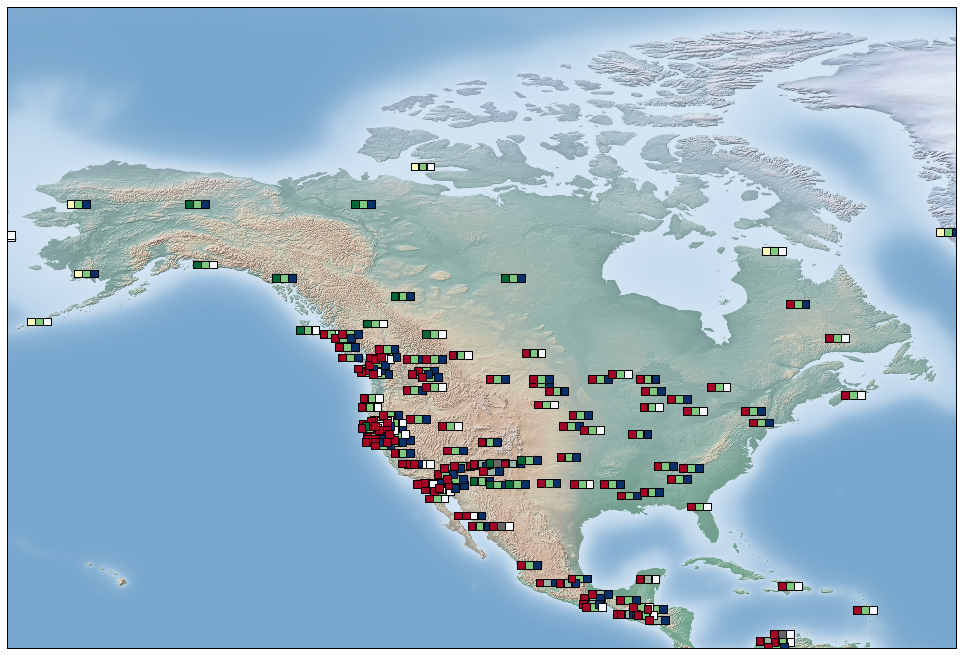

In [13]:
Image(filename='IEMaps\\NAMarriageMap.png')